# Health Analysis of Diabetes among Pima Indians

Analysis:
1. [Problem Introduction](#intro)<br>
2. [Exploratory Data Analysis](#eda)<br> 
3. [Predictive Modeling](#ml)<br>

Check your understanding:
1. [Check your understanding 1](#q1)<br>
1. [Check your understanding 2](#q2)<br>
1. [Check your understanding 3](#q3)<br>
1. [Check your understanding 4](#q4)<br>
1. [Check your understanding 5](#q5)<br>


<a id="intro"></a>
This notebook is derived from kaggle:
https://www.kaggle.com/rishpande/pima-indians-diabetes-beginner/comments#753067


# PIMA Indians Diabetes


## Background

**Diabetes**, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period.  Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger.  If left untreated, diabetes can cause many complications.  Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death.  Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This **dataset** is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of many analyses with this dataset has been to diagnostically predict whether or not a patient has diabetes based on the diagnostic measurements below as explanatory variables. 

A population of women who were at least 21 years old, of Pima Indian heritage and living near Phoenix, Arizona, was tested for diabetes according to World Health Organization criteria.  


## Objective

In this notebook, we will try to build a machine learning model to accurately predict whether the patients in the dataset have diabetes. We will then use these models to better understand what contributes to our population of interest developing diabetes. 

Your domain expertise is needed to help understand how to combat diabetes among Pima Indians. Ultimately, your goal is to learn about the population from historical data and apply your knowledge in the context of a public health plan. 


## Context
As we consider the relationships between variables, keep in mind how the information could be applied to a public health campaign. For instance, which of the explanatory variables might _cause_ diabetes and which might be an _effect_ of diabetes?


## Data

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* **Pregnancies**: Number of times pregnant
* **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure**: Diastolic blood pressure (mm Hg)
* **SkinThickness**: Triceps skin fold thickness (mm)
* **Insulin**: 2-Hour serum insulin (mu U/ml)
* **BMI**: Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction**: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* **Age**: Age (years)
* **Outcome**: Class variable (0 if non-diabetic, 1 if diabetic)




In [1]:
#for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image
#for modeling
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#for decision tree visualizations
import graphviz
from sklearn import tree
import pydotplus

#for graphviz path
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

df = pd.read_csv('diabetes.csv')

<a id="eda"></a>
# Exploratory Data Analysis

It's important to explore the data set before diving in. It's common that data is imperfect, and you are likely to find issues that need to be addressed before you can move forward with your analysis.

We'll start by looking at a sample of the data and some attributes of each feature in the data set.

In [2]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Removing erroneous data

We see that the variable "BMI" has a minimum value of '0'. BMIs aren't supposed to be zero, so we assume this is an error. Let's visualize the spread of this variable to see if anything else stands out. If there is only one value that seems erroneous, we'll remove that observation and move forward with our observation.

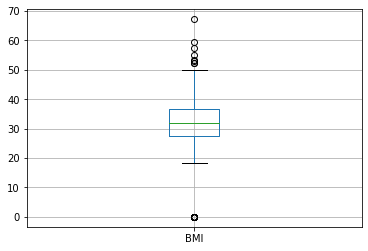

In [4]:
boxplot = df.boxplot(column=['BMI']) #box plot of BMI 

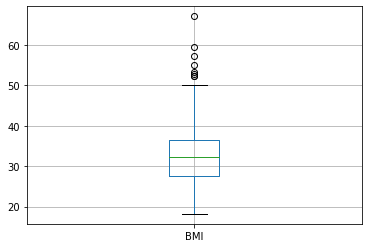

In [5]:
df = df[df.BMI != 0.0] #remove the erroneous observation 
df.boxplot(column=['BMI']); #new box plot of BMI 

Great! We don't see any further issues with our data set, so we'll move forward with visualizations and analysis.

## Data Visualization

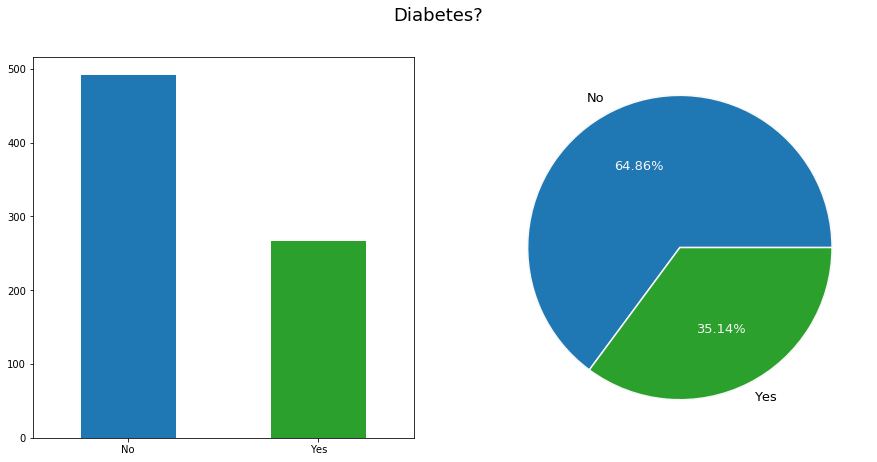

In [6]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = df.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = df.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

### Distributions

Now we'll explore the distribution of each variable, looking for big differences between those who _had diabetes_ and those who _did not have diabetes_.

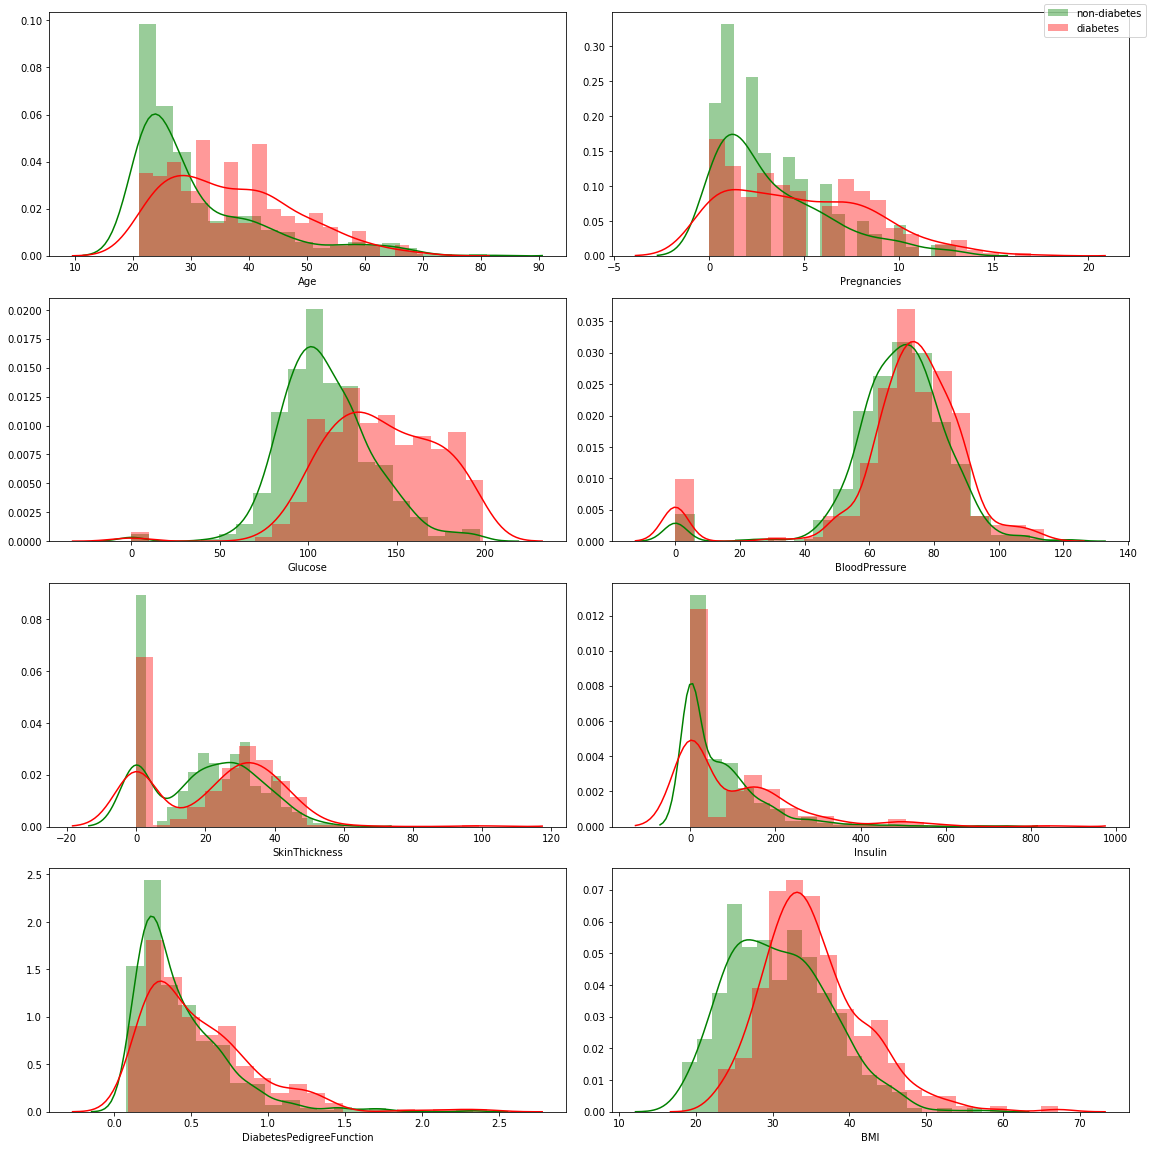

In [7]:
fig, ax = plt.subplots(4,2, figsize=(16,16))

df_0 = df[df.Outcome == 0] 
df_1 = df[df.Outcome == 1] 

sns.distplot(df_0.Age, bins = 20, ax=ax[0,0], color="g") 
sns.distplot(df_1.Age, bins = 20, ax=ax[0,0], color="r") 

sns.distplot(df_0.Pregnancies, bins = 20, ax=ax[0,1], color="g") 
sns.distplot(df_1.Pregnancies, bins = 20, ax=ax[0,1], color="r") 

sns.distplot(df_0.Glucose, bins = 20, ax=ax[1,0], color="g") 
sns.distplot(df_1.Glucose, bins = 20, ax=ax[1,0], color="r") 

sns.distplot(df_0.BloodPressure, bins = 20, ax=ax[1,1], color="g") 
sns.distplot(df_1.BloodPressure, bins = 20, ax=ax[1,1], color="r") 

sns.distplot(df_0.SkinThickness, bins = 20, ax=ax[2,0], color="g")
sns.distplot(df_1.SkinThickness, bins = 20, ax=ax[2,0], color="r")

sns.distplot(df_0.Insulin, bins = 20, ax=ax[2,1], color="g")
sns.distplot(df_1.Insulin, bins = 20, ax=ax[2,1], color="r")

sns.distplot(df_0.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0], color="g")
sns.distplot(df_1.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0], color="r")

sns.distplot(df_0.BMI, bins = 20, ax=ax[3,1], color="g") 
sns.distplot(df_1.BMI, bins = 20, ax=ax[3,1], color="r") 

fig.legend(labels=['non-diabetes','diabetes'])
plt.tight_layout()

<a id="q1"></a>
### Check your understanding: 

- Which of these variables seem to have high separation between classes? That is - do you see any big differences between red (diabetes) and green (no diabetes) distributions for any of these variables?


**potential answer**:

 <font color=red>Glucose and BMI <br>
Discussion: If high glucose causes diabetes, the solution may be simple: lower glucose! Is that the case? What is the relationship between glucose and diabetes?</font>
  



## Correlation between features

Variables within a dataset can be related for lots of reasons. It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation. 

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

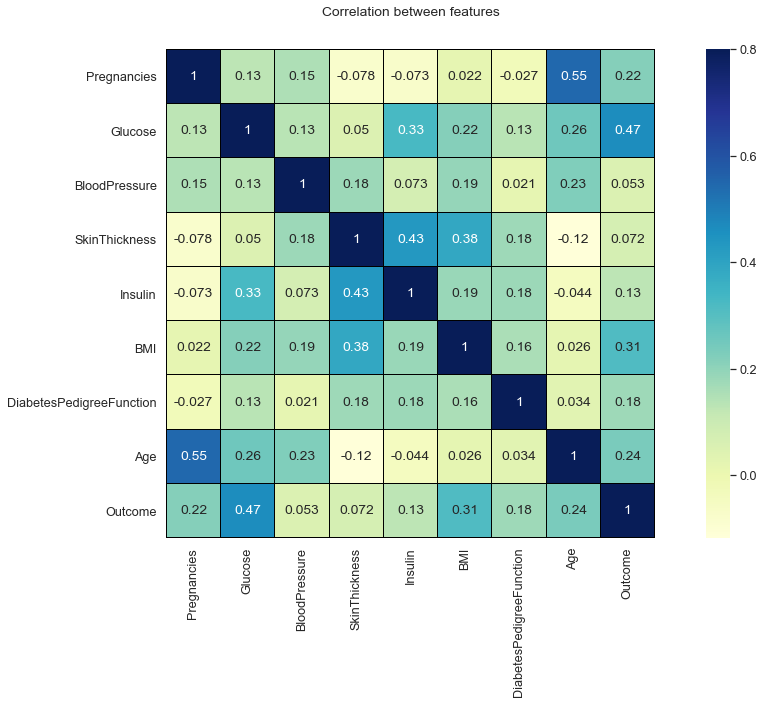

In [8]:
corr=df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(15, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features\n\n')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.tight_layout()

<a id="q2"></a>

### Check your understanding: 

- Which variables are highly correlated? Does this make sense to you? Discuss.


**potential answers**:
 <font color=red> <br>
- Pregnancies and Age: yes! This is logical, especially within one geographic region. If number of pregnancies turns out to be an important factor, we may want to evaluate _when_ pregnancies occur in this community and consider this in our campaign.  <br>
- Glucose and Insulin, Glucose and Outcome: what do we know about glucose, insulin, and diabetes? Does diabetes perhaps cause these? - if not already known, now we know these all certainly have some significant relationship.<br>
- BMI and Outcome: interesting! Can BMI be considered in a health campaign? </font>

### Taking a further look:

Some of these variables look like they may be correlated. While correlation does not equal causation, plots like this can help us understand how our features interact. 

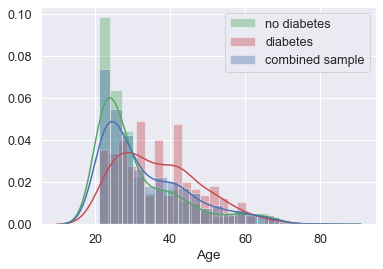

In [9]:
sns.distplot(df_0.Age, bins = 20, color="g") 
sns.distplot(df_1.Age, bins = 20, color="r") 
sns.distplot(df.Age, bins = 20) 
plt.legend(labels=['no diabetes', 'diabetes', 'combined sample']);

<a id="q3"></a>
### Check your understanding: 

- Does this population seem to develop diabetes later in life, or in earlier years? 
- Do you think a 40 year old seems much more likely to have diabetes than a 50 year old in this population? 

**potential answers**:
 <font color=red> <br>
- It seems there may be a difference before age 30, with no difference afterwards. While there are a lot more young (21-late twenties) people in this population without diabetes, this population does not seem to develop diabetes as a function of age after this (we can see that the red distribution is consistently higher than the blue, and the green is consistently lower). </font>

In [10]:
recode_df = df
recode_df.loc[(recode_df["Outcome"]==1),["Outcome"]] = "diabetes"
recode_df.loc[(recode_df["Outcome"]==0),["Outcome"]] = "no diabetes"

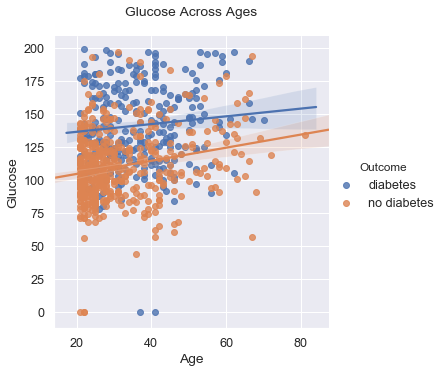

In [11]:
# Create lmplot
sns.lmplot(x='Age', y= 'Glucose', data=recode_df, hue="Outcome")
ax = plt.gca()
ax.set_title("Glucose Across Ages\n");


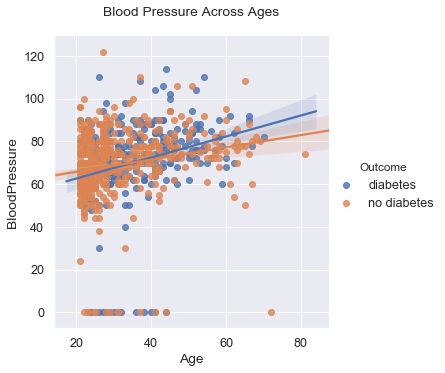

In [12]:
sns.lmplot(x='Age', y= 'BloodPressure', data=recode_df, hue="Outcome");
ax = plt.gca()
ax.set_title("Blood Pressure Across Ages\n");

<a id="q4"></a>
### Check your understanding: 

- Do you think an 80 year old is more or less likely than a 45 year old to have high blood pressure? 
- Given that a 60 year old in this population has high blood pressure, would you guess that they do or do not have diabetes? 
- What can you tell about the relationship between glucose and diabetes?

**answers**:
 <font color=red> <br> <br>
- more likely <br>
- You would guess they _do_ <br>
- there is definitely some association of glucose and diabetes, but remember - correlation is not causation! </font>

<a id="ml"></a>
# Predictive Modeling

### Split into testing and training data

To make sure our model will perform well on new observations, we will hold out a few observations, hiding them from the model. Once we think we've built a good model, we will reintroduce these observations and ask our model to make predictions about them as a test to see how well it performs. 

**Vocabulary:**
- **Training Data**: data we use to _teach_ our model
- **Testing Data**: data we hold out until our model is built to _test_ how it performs

Now we will split our predictors and our outcome variables into training and testing observations and take a look at our training data! 

In [13]:
#separate predictors and outcome variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#split our training data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


#let's look at our training data! 
X_train #a subset of predictors

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
36,11,138,76,0,0,33.2,0.420,35
467,0,97,64,36,100,36.8,0.600,25
246,10,122,68,0,0,31.2,0.258,41
407,0,101,62,0,0,21.9,0.336,25
80,3,113,44,13,0,22.4,0.140,22
...,...,...,...,...,...,...,...,...
718,1,108,60,46,178,35.5,0.415,24
197,3,107,62,13,48,22.9,0.678,23
638,7,97,76,32,91,40.9,0.871,32
568,4,154,72,29,126,31.3,0.338,37


## Logistic Regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary.  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [14]:
#Model
LR = LogisticRegression(solver ='lbfgs', max_iter=1000)

#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)



## Visualizing Logistic Regression Performance with a Confusion Matrix

<a id="confmat_dectree"></a>

Now let's use a "Confusion Matrix" to visualize how our classifier is doing at classifying our _test set_. 

A confusion matrix is a table that visualizes the performance of a classification algorithm. Each row corresponds to the true class label, here either diabetes or no-diabetes, while each column corresponds to the predicted class. The entry in each cell tells us the number of records of an actual class that were predicted as a given class. The table makes it easy to see how the algorithm is making mistakes. If it was perfect then we'd see zeros everywhere except on the diagonal (the predicted class was always the actual class).



Accuracy  77.89473684210526


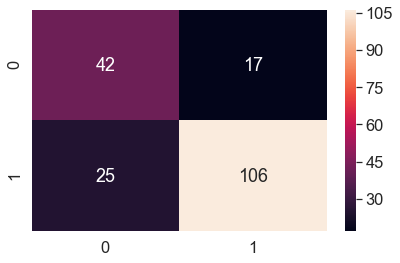

In [15]:
#Accuracy
print("Accuracy ", LR.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')


# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.tight_layout()
plt.show()

## Decision Tree

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

In [16]:
# Create a decision tree classifier model using scikit-learn
dt_classifier = sklearn.tree.DecisionTreeClassifier()

# Train the decision tree classifier
dt_classifier.fit(X_train, y_train)

#prediction
y_pred = dt_classifier.predict(X_test)

# Print the accuracy (percentage of phishing websites correctly predicted)
accuracy = 100.0 * sklearn.metrics.accuracy_score(y_test, y_pred)
print("The accuracy of your decision tree on testing data is: " + str(accuracy))

#make labels 
features = list(X_train.columns)
outcomes = ['diabetes', 'no diabetes']   



The accuracy of your decision tree on testing data is: 73.68421052631578


## Visualizing the Decision Tree Model

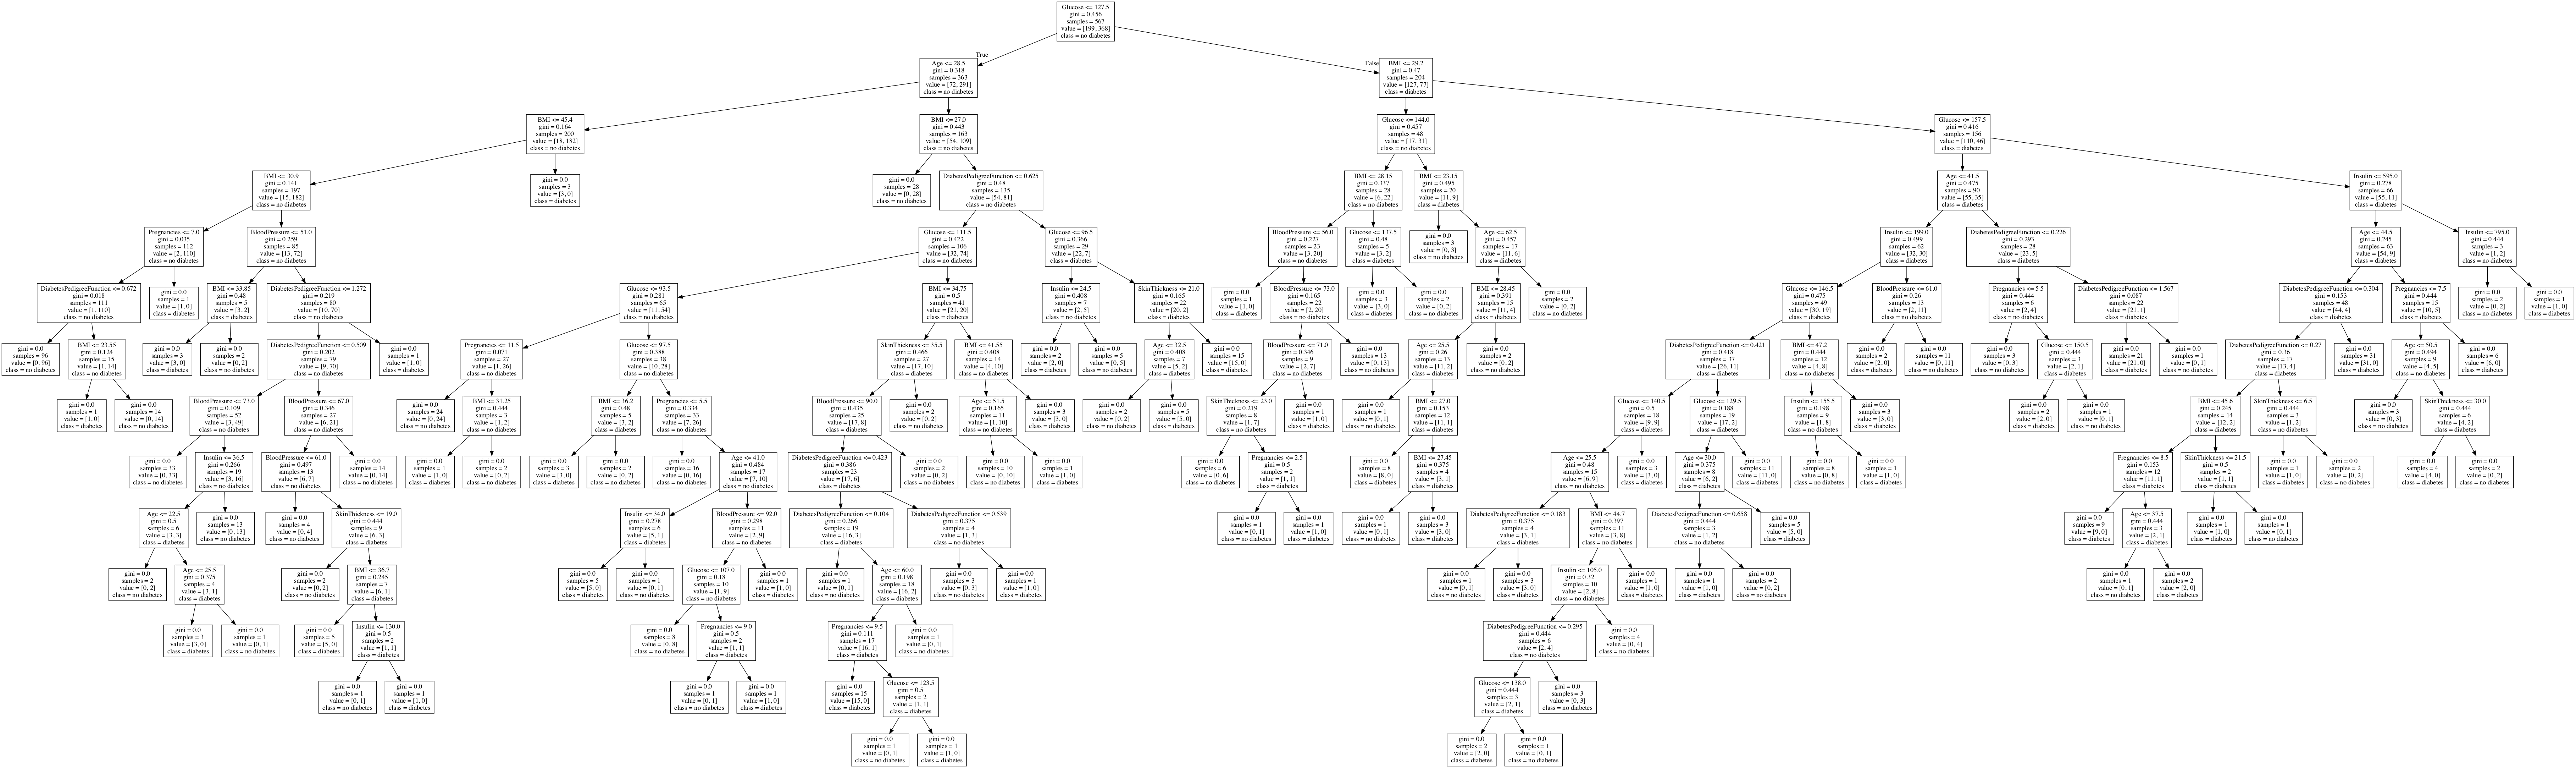

In [17]:
# Create DOT data
dot_data = tree.export_graphviz(dt_classifier, out_file=None, 
                                feature_names=features,  
                                class_names=outcomes)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

## Visualizing Decision Tree Performance with a Confusion Matrix


<a id="confmat_dectree"></a>



Accuracy  73.68421052631578


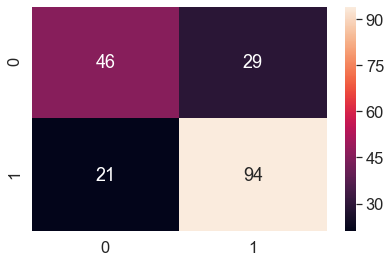

In [18]:
#Accuracy
print("Accuracy ", dt_classifier.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.tight_layout()
plt.show()

## Feature Importance

We can understand how our model makes decisions and which variables are important predictors. To take a closer look at the relative importance of each variable as a predictor of diabetes, we can investigate the variable importance from sklearn's feature_importances_.

To learn more about feature importance from the gini index, check out:
https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

In [19]:
dt_classifier.feature_importances_
feature_imp = pd.DataFrame(dt_classifier.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_imp


,importance
Glucose,0.302246
BMI,0.199907
Age,0.145905
DiabetesPedigreeFunction,0.126236
BloodPressure,0.071205
Insulin,0.066238
Pregnancies,0.047508
SkinThickness,0.040755


<a id="q5"></a>
### Check your understanding: 

- If you were going to create educational material for this population, which of the explanatory variables might you discuss? How might you decide that? 
- Discuss the limitations of this information without context. 

**potential answers**: 
 <font color=red> <br>
- BMI could be a variable to address. The idea is to think: Which of these variables are most important _and_ possibly preventable? <br>
- While glucose might be very helpful in predicting whether people have diabetes, it may not necessarily be a _cause_. </font>